# Testing an 'online' estimator for $R_n$

### Imports

In [67]:
import numpy as np
import matplotlib.pyplot as plt

### Noise Generator $N_t$
A core assumption of the SPS algorithm is that the noise is zero mean, symmetric and iid

# ARMAX Generator
Class for simulating a system of the form $A(q)y(t) = B(q)u(t) + C(q)e(t) + D$

This class has been developed with the intention of running it in 'online' mode where an update function will be called at each cycle

In [83]:
class ARMAX_Generator:
    def __init__(self, A: list, B: list, C: list, D: list, input_controller) -> None:
        # System Parameters
        self.A = A  # AR coefficients
        self.B = B  # X input coefficients
        self.C = C  # MA coefficients
        self.D = D  # Constant term

        self.order = max(len(A), len(B), len(C)) 

        # TODO Replace this with actual controller logic
        def temp_input_controller(y, u) -> float: 
            sigma = 0.1
            return 0.4 * y[-1] + np.random.normal(sigma)

        # TODO replace this with the input parameter in the constructor
        self.input_controller = temp_input_controller #input_controller

        # State
        # The below vectors should all be of the same length equal to the current time step
        self.y = []  # Output of the system
        self.u = []  # Input to the system
        self.e = []  # Noise input to the system

    # TODO Replace this with a user-provided noise function
    def generate_noise(self) -> float:
        sigma = 0.1
        self.e.append(np.random.normal(0, sigma))
    
    # Generate new datapoints for the next timestep and append it to the system's state
    def generate_datapoint(self):
        pass 
        # AR component
        crossover = min(len(self.A)-1, len(self.y)) # Calculate the overlap between A(2), A(3), A(...) and the past inputs
        ar_sum = np.matmul(self.A[1:crossover+1:][::-1], self.y[-crossover::]) # Reverse the order of the coefficients and multiply the matrices

        # Exogenous input component
        crossover = min(len(self.B), len(self.u))
        # if crossover > 0:
        exo_sum = np.matmul(self.B[:crossover:][::-1], self.u[-crossover::])

        # MA component
        crossover = min(len(self.C), len(self.e))
        ma_sum = np.matmul(self.C[:crossover:][::-1], self.e[-crossover::])

        # Compute output
        self.y.append( -ar_sum + exo_sum + ma_sum + self.D / self.A[0])
        self.u.append( self.input_controller(self.y, self.u) )

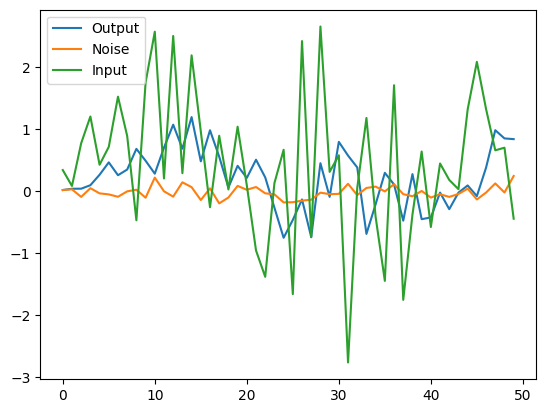

In [89]:
# Test the ARMAX Generator
theta_real = [0.44, 0.33, 0]
A = [1, -theta_real[0]];    # AR coefficients
B = [0, theta_real[1]];     # MA coefficients
C = [1, theta_real[2]];     # input coefficients
D = 0;                      # Constant term
generator = ARMAX_Generator(A, B, C, D, None)

for i in range(50):
    generator.generate_noise()
    generator.generate_datapoint()



fig = plt.figure()
plt.plot(generator.y)
plt.plot(generator.e)
plt.plot(generator.u)
plt.legend(['Output', 'Noise', 'Input'])
plt.show()

# Testing

In [91]:
# A = np.array([1,2,3])
# prev_outputs = [1,2,3,4]
# crossover = min(len(A)-1, len(prev_outputs))
# if crossover > 0:
#     print(crossover)
#     A_prime = A[crossover::-1]
#     prev_outputs_prime = prev_outputs[-crossover::]

#     print(A_prime)
#     print(prev_outputs_prime)
#     print(np.matmul(A_prime, prev_outputs_prime))